# Heart Attack Analysis and Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load the data

In [3]:
# Load the data
df = pd.read_csv('Heart Attack Analysis & Prediction Dataset.csv')

## Data Exploration
### Overview

In [4]:
print("Dataset Shape:", df.shape)
print("\nFirst five rows of the dataset:")
print(df.head())

Dataset Shape: (303, 14)

First five rows of the dataset:
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [5]:
print("\nInformation about data types and null values:")
print(df.info())


Information about data types and null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [6]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())



Missing values in the dataset:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [7]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std  


Target variable distribution:
output
1    165
0    138
Name: count, dtype: int64


C:\Users\Mehdi\AppData\Local\Temp\ipykernel_15700\1273252331.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='output', data=df, palette='Set1')


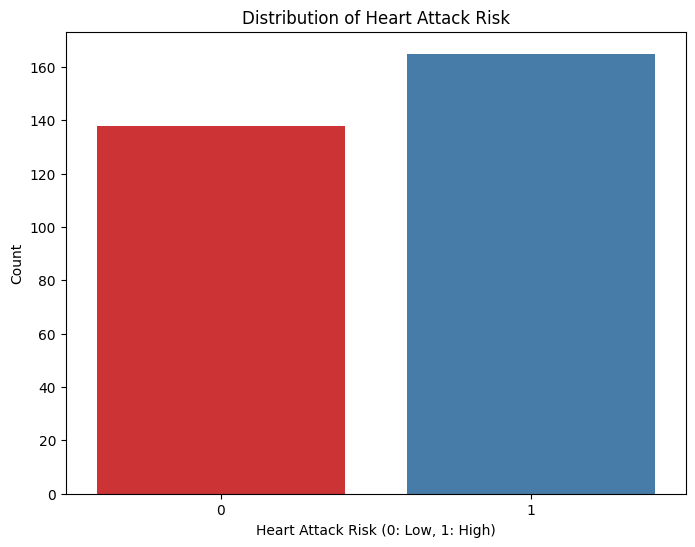

In [8]:
# Distribution of the dependent variable (target)
print("\nTarget variable distribution:")
print(df['output'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x='output', data=df, palette='Set1')
plt.title('Distribution of Heart Attack Risk')
plt.xlabel('Heart Attack Risk (0: Low, 1: High)')
plt.ylabel('Count')
plt.show()

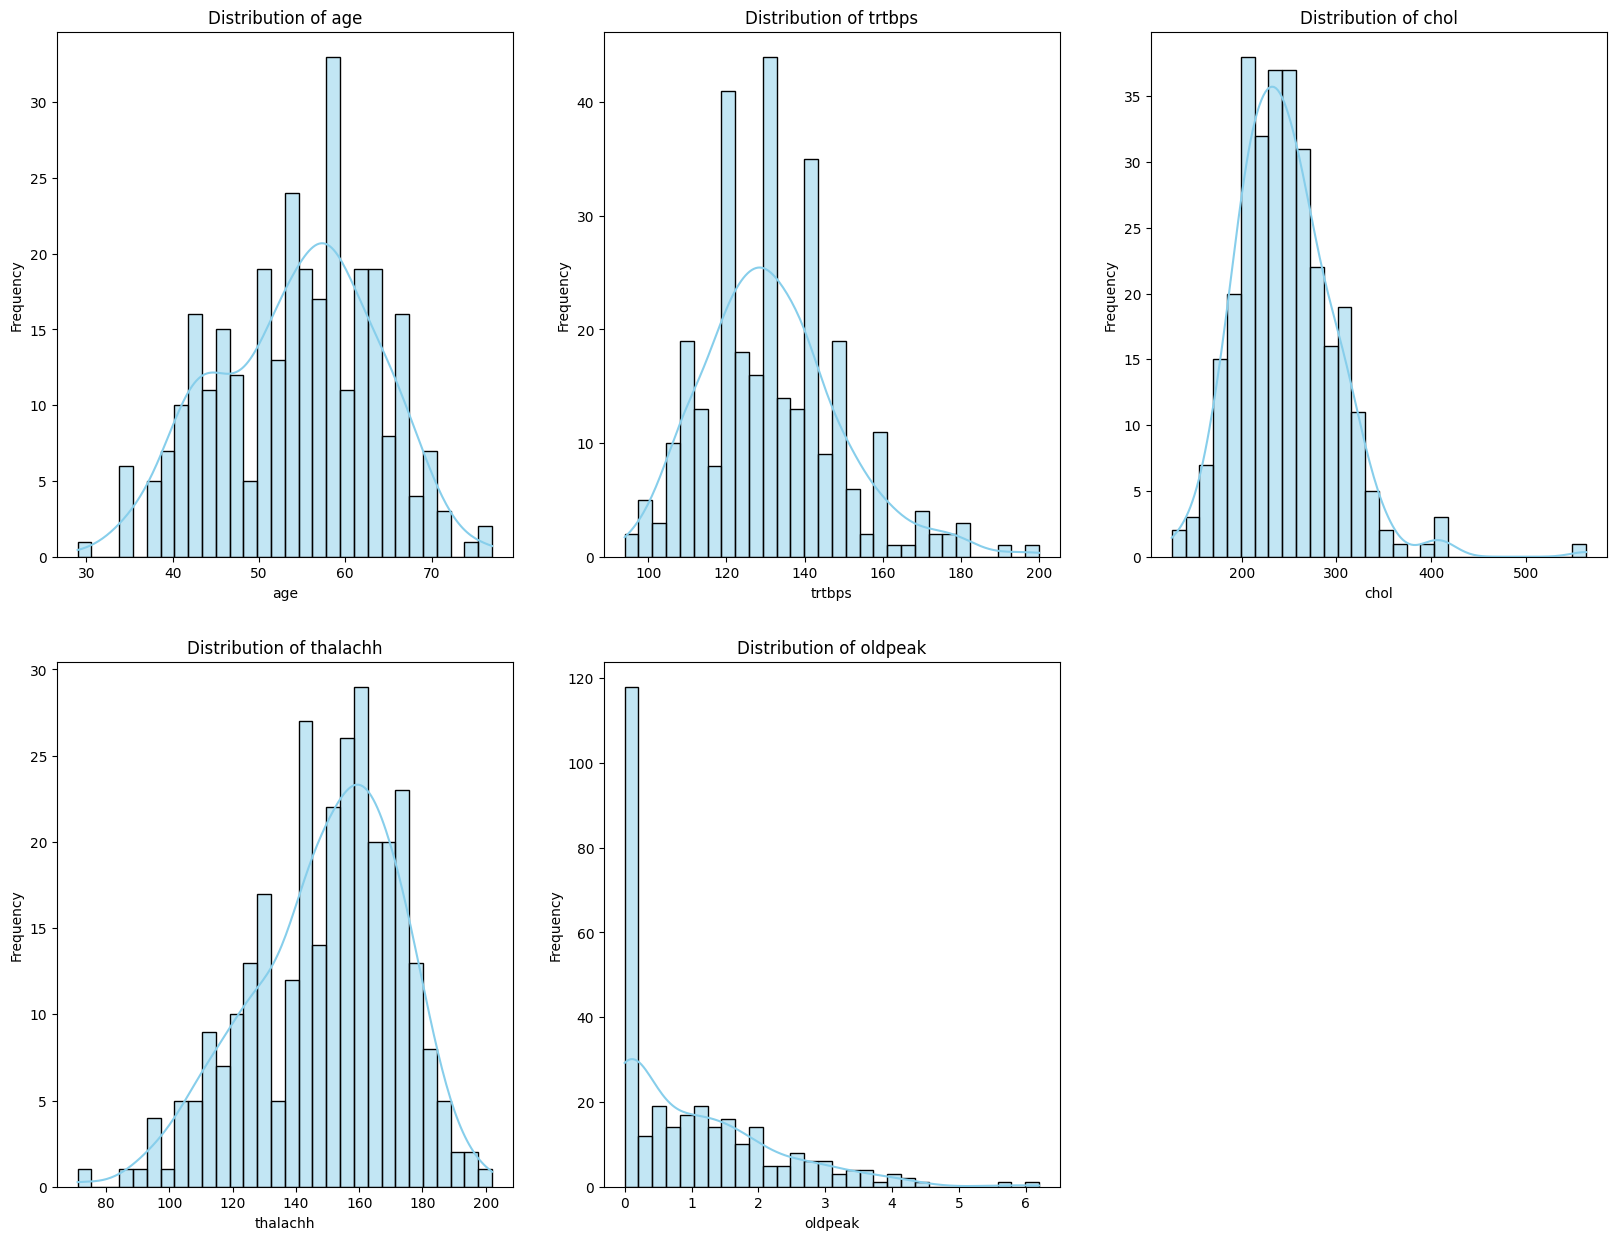

In [9]:
# Exploring the distribution of numerical features
numerical_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

* **Age**: The distribution is roughly normal, with most patients aged between 50 and 60 years. This suggests that middle-aged individuals are more represented in the dataset.
* **Resting Blood Pressure (trtbps)**: The distribution is right-skewed, with most values around 120-140 mm Hg, which is a typical range.
* **Cholesterol (chol)**: This is also right-skewed, with a peak around 200-300 mg/dl, but there are a few outliers with values over 400 mg/dl.
* **Maximum Heart Rate Achieved (thalachh)**: This distribution is fairly normal, with most values between 140-160 bpm.
* **Oldpeak**: The "oldpeak" feature is heavily skewed toward low values, with the majority of the values being less than 2, which represents low ST depression after exercise.

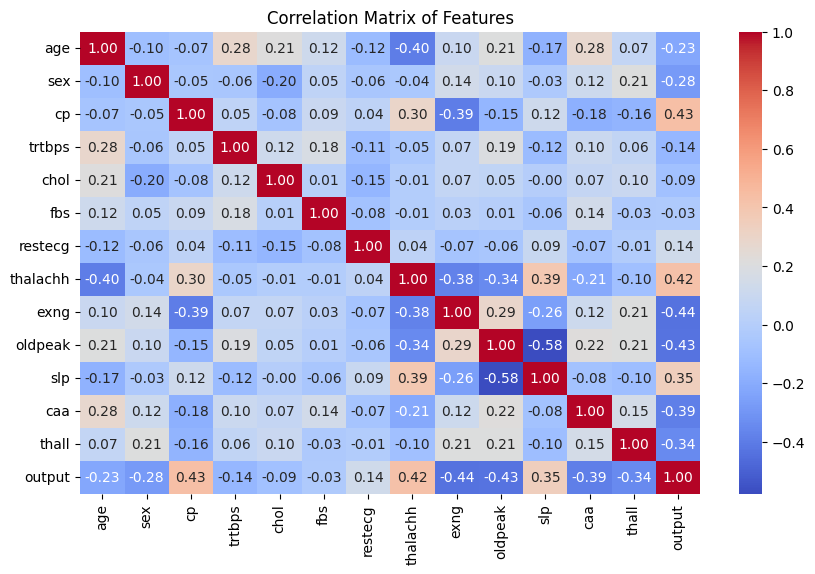

In [10]:
# Correlation heatmap of numerical features
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()


* **Chest Pain Type (cp)** has the highest positive correlation with the target variable (output), indicating that chest pain type is a strong predictor of heart attack risk.
* **Oldpeak** has a relatively strong negative correlation with the target variable, meaning higher values of ST depression (oldpeak) are associated with a lower chance of heart attack.
* **Exercise Induced Angina (exng)** and Maximum Heart Rate (**thalachh**) also have notable correlations with the target, with negative correlations suggesting that a lower maximum heart rate and exercise-induced angina are linked with a higher risk of heart attack.
* **Age and Resting Blood Pressure** (**trtbps**) show weak correlations with the target variable, meaning they might not be the most significant predictors of heart attack risk.

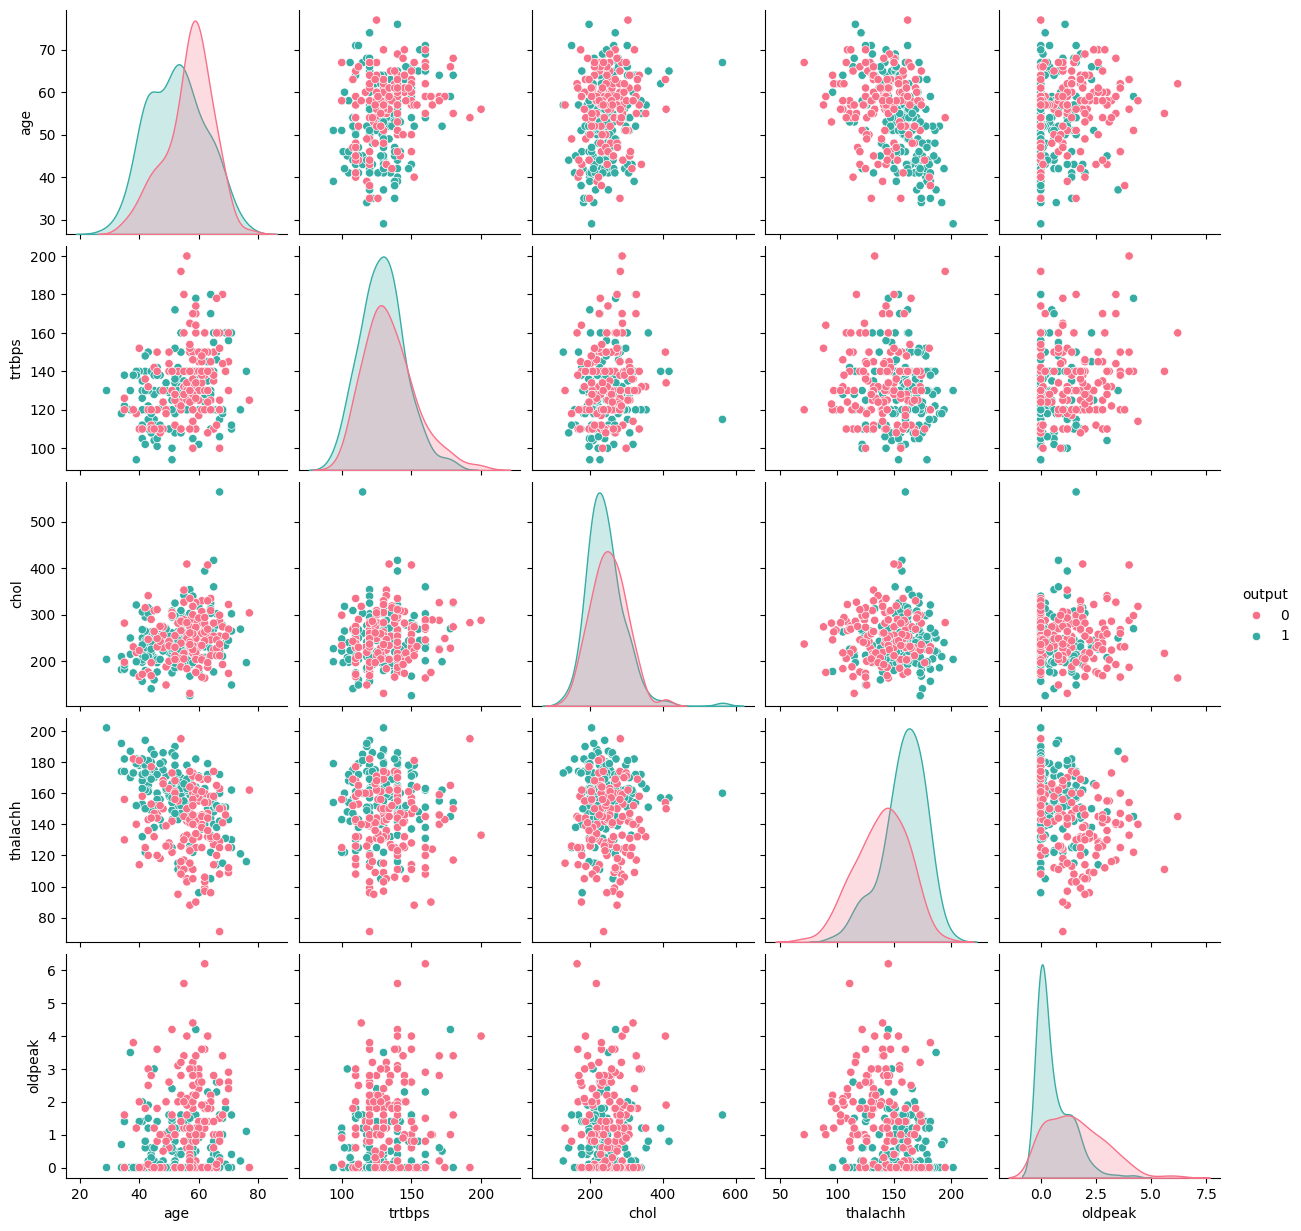

In [11]:
# Pairplot to visualize relationships between features
# This might take time for larger datasets, so use only important features
important_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']
sns.pairplot(df[important_features], hue='output', palette="husl")
plt.show()

C:\Users\Mehdi\AppData\Local\Temp\ipykernel_15700\3154244920.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='output', y=feature, data=df, palette="Set3")
C:\Users\Mehdi\AppData\Local\Temp\ipykernel_15700\3154244920.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='output', y=feature, data=df, palette="Set3")
C:\Users\Mehdi\AppData\Local\Temp\ipykernel_15700\3154244920.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='output', y=feature, data=df, palette="Set3")
C:\Users\Mehdi\AppData\Local\Temp\ipykernel_15700\3154244920.py:

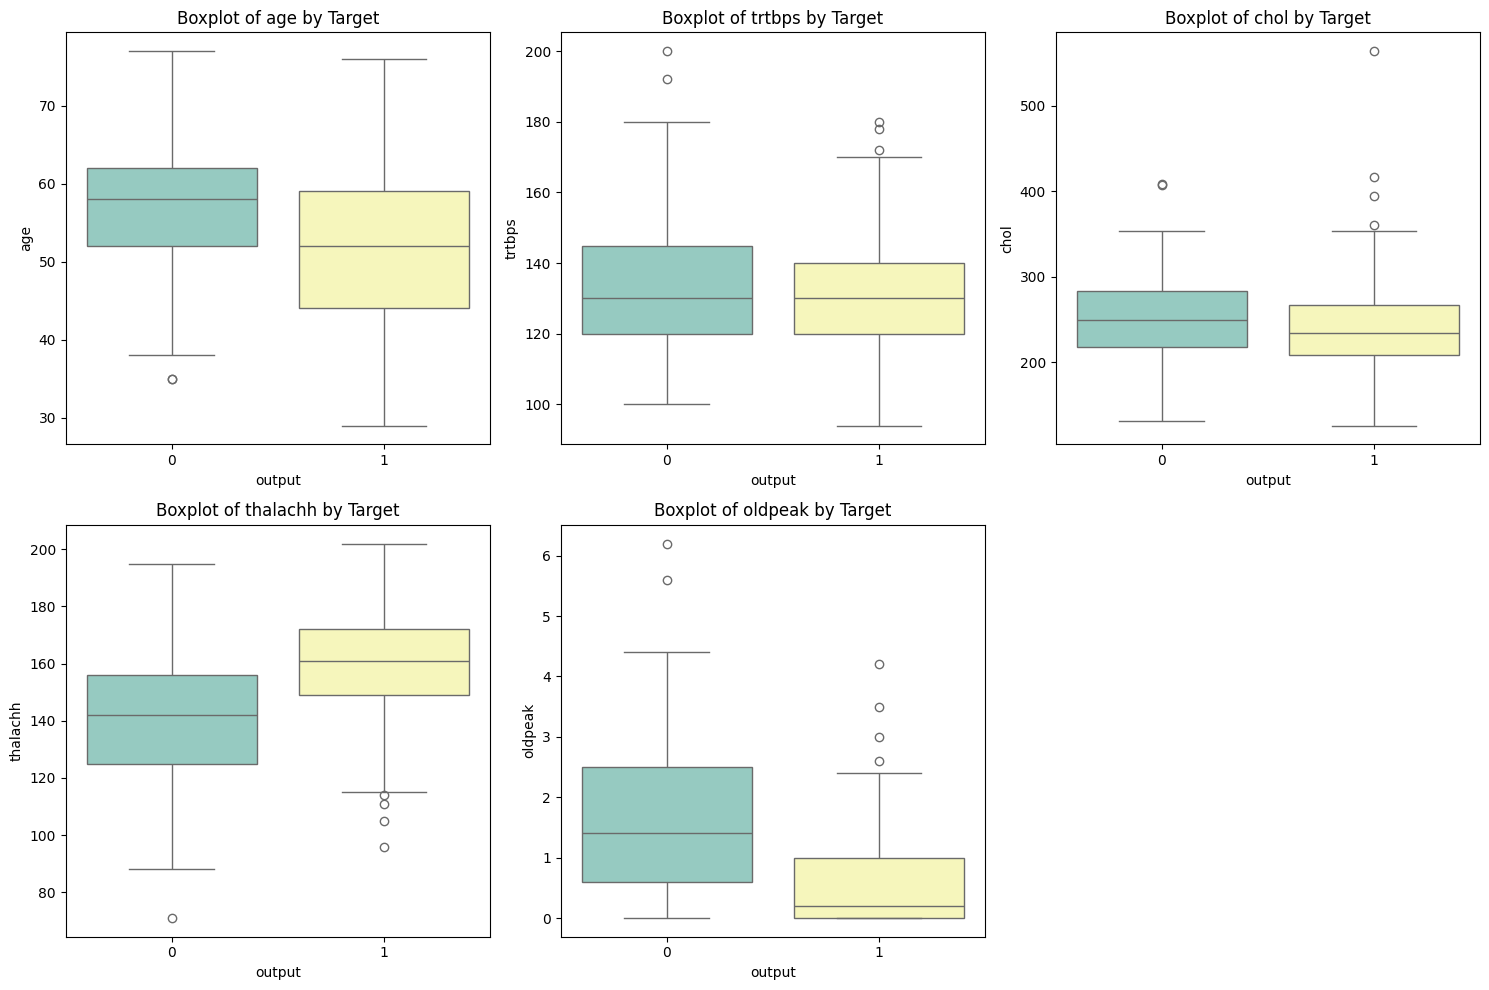

In [12]:
# Boxplots for outlier detection in numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='output', y=feature, data=df, palette="Set3")
    plt.title(f'Boxplot of {feature} by Target')
plt.tight_layout()
plt.show()

* **Age**: Patients who are more likely to have a heart attack tend to be slightly younger, around 50-55 years old, compared to those with less chance, who tend to be a bit older.
* **Resting Blood Pressure (trtbps)**: The boxplots show some outliers, but in general, there's no significant difference between the two groups (heart attack risk and no heart attack risk).
* **Cholesterol (chol)**: There are some outliers with very high cholesterol levels, but otherwise, cholesterol levels are fairly similar across the two groups.
* **Maximum Heart Rate (thalachh)**: Patients with a higher risk of heart attack tend to have higher maximum heart rates.
* **Oldpeak**: There's a clear difference between the two groups, with lower oldpeak values being associated with a higher chance of heart attack.

In [13]:
# Checking for multicollinearity (Variance Inflation Factor - VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X = df[numerical_features]
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF) for each numerical feature:")
print(vif)


Variance Inflation Factor (VIF) for each numerical feature:
    Feature        VIF
0       age  36.410374
1    trtbps  55.751559
2      chol  24.228662
3  thalachh  29.378507
4   oldpeak   2.093841


C:\Users\Mehdi\AppData\Local\Temp\ipykernel_15700\1086147879.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis')


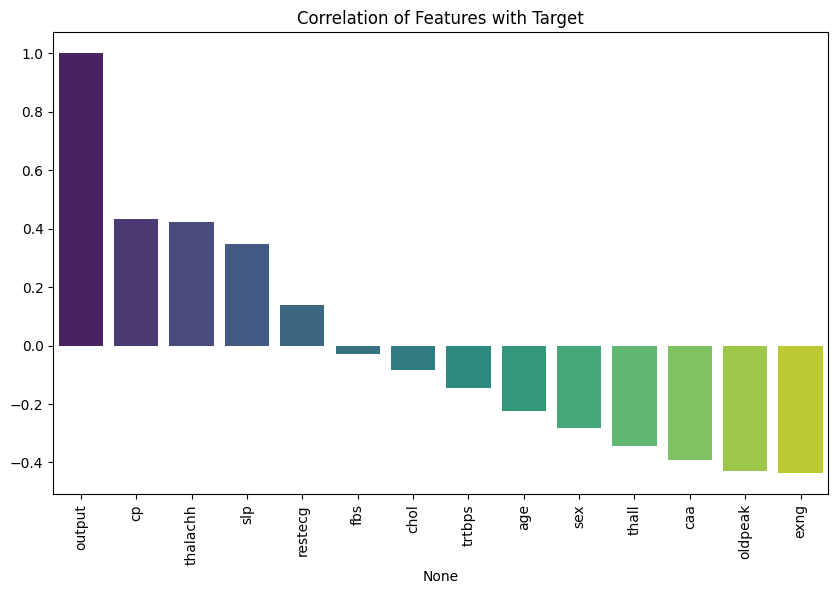

In [14]:
# Correlation between target and features
plt.figure(figsize=(10, 6))
correlation_with_target = df.corr()['output'].sort_values(ascending=False)
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis')
plt.title('Correlation of Features with Target')
plt.xticks(rotation=90)
plt.show()

** ** 
**Chest Pain Type (cp), Oldpeak, Exercise Induced Angina (exng), and Maximum Heart Rate (thalachh)** are strong indicators of heart attack risk.
Some features like **Cholesterol and Resting Blood Pressure** do not show strong **correlations** with the target and may have **outliers**.
Boxplots suggest some trends and potential outliers in features like **chol, trtbps, and oldpeak** that might require further attention during preprocessing, especially for removing or transforming outliers.
** ** 

## Data Transformation

In [15]:
from scipy.stats import zscore

In [16]:
# Apply log transformations to skewed features: 'oldpeak' and 'chol'
df['oldpeak_log'] = np.log1p(df['oldpeak'])  # log1p handles values close to 0
df['chol_log'] = np.log1p(df['chol'])

# Check for outliers in 'chol' and 'trtbps' using z-score
# Calculate z-scores for 'chol' and 'trtbps'
df['chol_z'] = zscore(df['chol'])
df['trtbps_z'] = zscore(df['trtbps'])

# Define a threshold for identifying outliers (z-score > 3 or < -3)
outlier_threshold = 3

# Filter out rows where z-score of 'chol' or 'trtbps' is beyond the threshold
df_cleaned = df[(df['chol_z'].abs() < outlier_threshold) & (df['trtbps_z'].abs() < outlier_threshold)]

# Drop the temporary z-score columns used for detecting outliers
df_cleaned = df_cleaned.drop(columns=['chol_z', 'trtbps_z'])

# Drop the original columns 'oldpeak' and 'chol' as their transformed versions are used
df_cleaned = df_cleaned.drop(columns=['oldpeak', 'chol'])

# Feature selection: Prepare the final dataset for modeling
X = df_cleaned.drop(columns=['output'])  # 'output' is the target variable
y = df_cleaned['output']

## Models

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training set: {X_train.shape}, Test set: {X_test.shape}')


Training set: (237, 13), Test set: (60, 13)


In [18]:
# Create a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Naive Bayes': GaussianNB(),
    'SVM (Support Vector Machine)': SVC(kernel='rbf', gamma='scale'),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(n_neighbors=5),
}

## Evaluation & Comparaison

In [19]:
# Function to evaluate each model
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Get classification report
        report = classification_report(y_test, y_pred, output_dict=True)
        
        # Store the results
        results[name] = {'accuracy': accuracy, 'classification_report': report}
        
        # Print model performance
        print(f"Model: {name}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Classification Report:\n {classification_report(y_test, y_pred)}\n")

    # Extract model names and their accuracies for plotting
    model_names = list(results.keys())
    accuracies = [result['accuracy'] for result in results.values()]

    # Create a bar plot for model accuracies
    plt.figure(figsize=(10, 6))
    plt.barh(model_names, accuracies, color='skyblue')
    plt.xlabel('Accuracy')
    plt.title('Model Comparison by Accuracy')
    plt.xlim(0, 1)
    for index, value in enumerate(accuracies):
        plt.text(value + 0.01, index, f"{value:.4f}")
    plt.show()
    
    return results

Model: Logistic Regression
Accuracy: 0.8333
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.73      0.79        26
           1       0.82      0.91      0.86        34

    accuracy                           0.83        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.84      0.83      0.83        60


Model: Naive Bayes
Accuracy: 0.8333
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80        26
           1       0.83      0.88      0.86        34

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60


Model: SVM (Support Vector Machine)
Accuracy: 0.6667
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.42      0.52        26
           1       0.66      0

d:\anaconda\envs\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


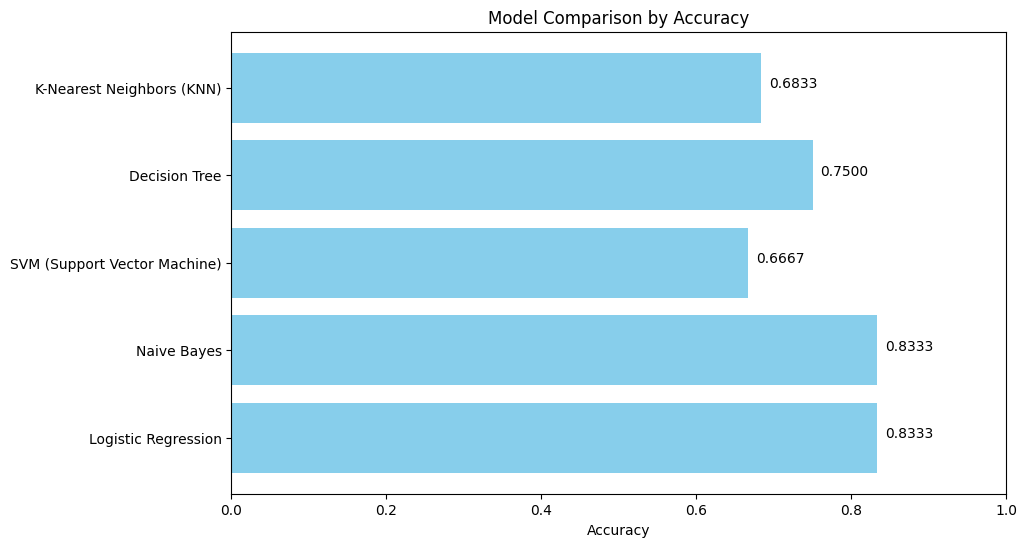

In [20]:
# Evaluate all models
model_results = evaluate_models(models, X_train, X_test, y_train, y_test)

## Hyperparameter Tuning

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid_rl = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l1', 'l2']
}
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid_rl = GridSearchCV(LogisticRegression(), param_grid_rl, refit=True, verbose=2)
grid_svm = GridSearchCV(SVC(), param_grid_svm, refit=True, verbose=2)

grid_rl.fit(X_train, y_train)
grid_svm.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solv

d:\anaconda\envs\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\anaconda\envs\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=

d:\anaconda\envs\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\anaconda\envs\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=1

d:\anaconda\envs\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\anaconda\envs\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...................

KeyboardInterrupt: 

In [75]:
# Best parameters for Logistic Regression
print(grid_rl.best_params_)

# Best parameters for SVM
print(grid_svm.best_params_)


{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


Model: Logistic Regression
Accuracy: 0.8167
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.69      0.77        26
           1       0.79      0.91      0.85        34

    accuracy                           0.82        60
   macro avg       0.83      0.80      0.81        60
weighted avg       0.82      0.82      0.81        60


Model: Logistic Regression ref
Accuracy: 0.8333
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.73      0.79        26
           1       0.82      0.91      0.86        34

    accuracy                           0.83        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.84      0.83      0.83        60




d:\anaconda\envs\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


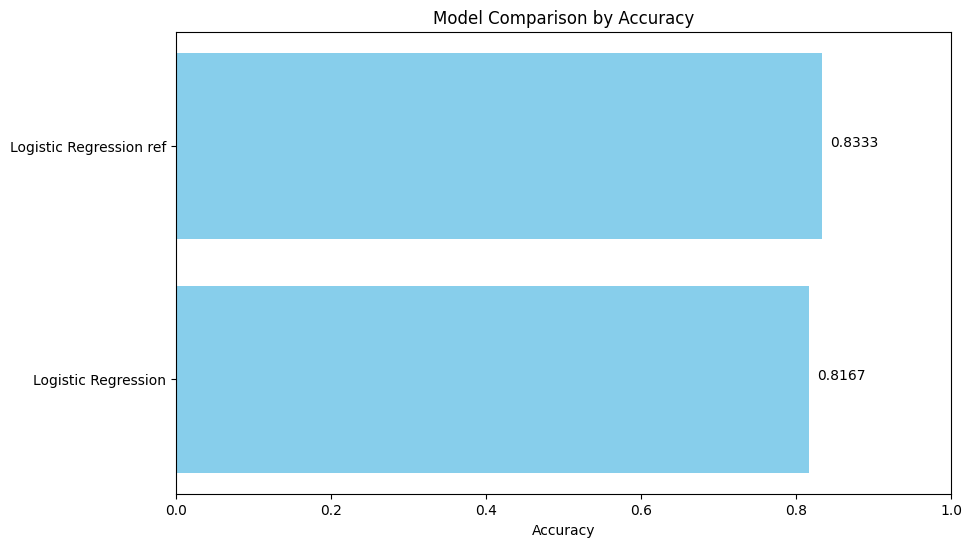

{'Logistic Regression': {'accuracy': 0.8166666666666667,
  'classification_report': {'0': {'precision': 0.8571428571428571,
    'recall': 0.6923076923076923,
    'f1-score': 0.7659574468085106,
    'support': 26.0},
   '1': {'precision': 0.7948717948717948,
    'recall': 0.9117647058823529,
    'f1-score': 0.8493150684931506,
    'support': 34.0},
   'accuracy': 0.8166666666666667,
   'macro avg': {'precision': 0.826007326007326,
    'recall': 0.8020361990950227,
    'f1-score': 0.8076362576508307,
    'support': 60.0},
   'weighted avg': {'precision': 0.8218559218559219,
    'recall': 0.8166666666666667,
    'f1-score': 0.8131934324298068,
    'support': 60.0}}},
 'Logistic Regression ref': {'accuracy': 0.8333333333333334,
  'classification_report': {'0': {'precision': 0.8636363636363636,
    'recall': 0.7307692307692307,
    'f1-score': 0.7916666666666666,
    'support': 26.0},
   '1': {'precision': 0.8157894736842105,
    'recall': 0.9117647058823529,
    'f1-score': 0.8611111111111

In [76]:
evaluate_models({'Logistic Regression': grid_rl.best_estimator_,
                    'SVM (Support Vector Machine)': grid_svm.best_estimator_}, X_train, X_test, y_train, y_test)

## Cross-Validation

In [78]:
from sklearn.model_selection import cross_val_score

# visualize the cross-validation scores for each model
def visualize_cv_scores(models, X, y):
    cv_results = {}
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        cv_results[name] = scores
        print(f"Model: {name}")
        print(f"Scores: {scores}")
        print(f"Mean Accuracy: {scores.mean():.4f}")
        print(f"Standard Deviation: {scores.std():.4f}\n")

    # Create a boxplot to compare the models
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=pd.DataFrame(cv_results))
    plt.title('Cross-Validation Scores for Various Models')
    plt.ylabel('Accuracy')
    plt.show()

visualize_cv_scores({'Logistic Regression': grid_rl.best_estimator_,
                    'SVM (Support Vector Machine)': grid_svm.best_estimator_}, X, y)



Precision across folds: 0.8312949415759512


d:\anaconda\envs\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\anaconda\envs\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c